In [1]:
%matplotlib inline

In [2]:
from stable_baselines.results_plotter import load_results, ts2xy

In [3]:
import papermill as pm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def movingAverage(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = movingAverage(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()


In [5]:
nbs = pm.read_notebooks('./')

In [6]:
nbs.dataframe

,name,value,type,filename,key
0,h1_dim,128,parameter,out_1540892594_ppo.ipynb,out_1540892594_ppo.ipynb
1,h2_dim,64,parameter,out_1540892594_ppo.ipynb,out_1540892594_ppo.ipynb
2,ts_num,5000000,parameter,out_1540892594_ppo.ipynb,out_1540892594_ppo.ipynb
3,log_dir,/tmp/gym/1540892660,record,out_1540892594_ppo.ipynb,out_1540892594_ppo.ipynb
4,h1_dim,64,parameter,out_1540892603_ppo.ipynb,out_1540892603_ppo.ipynb
5,h2_dim,32,parameter,out_1540892603_ppo.ipynb,out_1540892603_ppo.ipynb
6,ts_num,5000000,parameter,out_1540892603_ppo.ipynb,out_1540892603_ppo.ipynb
7,log_dir,/tmp/gym/1540892658,record,out_1540892603_ppo.ipynb,out_1540892603_ppo.ipynb
8,h1_dim,32,parameter,out_1540892612_ppo.ipynb,out_1540892612_ppo.ipynb
9,h2_dim,16,parameter,out_1540892612_ppo.ipynb,out_1540892612_ppo.ipynb


In [40]:
x = nbs.dataframe.loc[nbs.dataframe.key == 'out_1540892612_ppo.ipynb', ["name", "value"]]

In [43]:
x.set_index("name").T

name,h1_dim,h2_dim,ts_num,log_dir
value,32,16,5000000,/tmp/gym/1540892658


     name value
0  h1_dim   128
1  h2_dim    64


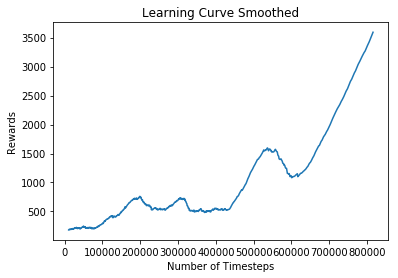

     name value
4  h1_dim    64
5  h2_dim    32
     name value
8  h1_dim    32
9  h2_dim    16
      name value
12  h1_dim    16
13  h2_dim     8


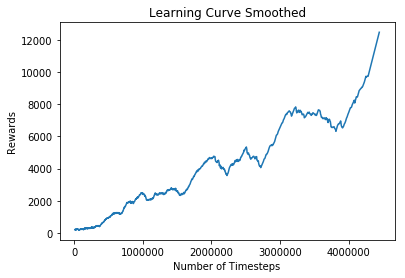

In [47]:
for key in nbs.dataframe.key.unique():
    idx = nbs.dataframe.name.str.contains("^h") & (nbs.dataframe.key == key)
    print(nbs.dataframe.loc[idx, ["name", "value"]])
    try:
        idx = (nbs.dataframe.name == 'log_dir') & (nbs.dataframe.key == key)
        plot_results(nbs.dataframe.value.loc[idx].values[0])
    except:
        pass

In [ ]:
for d in nbs.dataframe.value.loc[idx]:
    print(d)
    plot_results(d)

In [ ]:
for key in nbs.dataframe.key.unique():
    nbs.display_output(key, 'matplotlib_plot')